## Analysis of Lewd Conduct Calls

by Stacy Montemayor

An examination of how longer time deltas between when the complaint was received and when an officer arrived on scene affects outcomes of lewd conduct calls.

In [38]:
import pandas as pd
import numpy as np
from pySankey import sankey

from ipysankeywidget import SankeyWidget

In [5]:
%matplotlib inline

### Import cleaned data

In [47]:
%run import_clean_call_data.ipynb

### Analysis

In [4]:
# Bad sankey widget - coul dnot get to work
links = [
    {'source': 'start', 'target': 'A', 'value': 2},
    {'source': 'A', 'target': 'B', 'value': 2},
    {'source': 'C', 'target': 'A', 'value': 2},
    {'source': 'A', 'target': 'C', 'value': 2},
]
w = SankeyWidget(links=links, margins=dict(top=0, bottom=0, left=50, right=100))

Cleaning requirements: 
- remove all but lewd conduct calls
- figure out how to determine if they're happening currently-ish
- Create ~5 time buckets
- Flow each precinct into a time bucket
- Then flow into how event was cleared


What I want to see: 
scatterplot of timedelta by precinct  
time deltas by precinct

In [48]:
# Create dataframe that will contain all lewd conduct calls 
lewd_conduct_df = pd.DataFrame(data)

# Create dataframe containing only lewd conduct calls
lewd_conduct_df = lewd_conduct_df[is_lewd_conduct]

In [49]:
lewd_conduct_df.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,Lewd Conduct,2010-02-27 22:54:25,2010-02-27 22:55:45,North,UNION,U1,80,2010,2,no,no,other sex crime
2010000001201,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",Lewd Conduct,2010-01-02 00:37:29,2010-01-02 00:42:16,West,DAVID,D2,287,2010,1,no,no,other sex crime
2010000001213,ASSISTANCE RENDERED,ONVIEW,7,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,Lewd Conduct,2010-01-02 00:51:02,2010-01-02 00:51:03,West,DAVID,D2,1,2010,1,no,no,other sex crime
2010000001517,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",Lewd Conduct,2010-01-02 11:14:25,2010-01-02 11:35:16,East,EDWARD,E1,1251,2010,1,no,no,other sex crime
2010000002053,REPORT WRITTEN (NO ARREST),ONVIEW,7,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,Lewd Conduct,2010-01-02 21:15:49,2010-01-02 21:15:49,North,BOY,B3,0,2010,1,no,no,other sex crime


In [50]:
# Remove onviews
lewd_conduct_df = lewd_conduct_df[lewd_conduct_df.call_type != 'ONVIEW']

# Remove calls with unknown precicnt
lewd_conduct_df = lewd_conduct_df[lewd_conduct_df.precinct != 'Unknown']
lewd_conduct_df.shape

(5045, 16)

In [68]:
# Show calls with bad time_deltas
neg_timedeltas_df = lewd_conduct_df[lewd_conduct_df.time_delta < 0]
neg_timedeltas_df

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,


In [55]:
# Remove calls with bad time_delta
lewd_conduct_df = lewd_conduct_df[lewd_conduct_df.time_delta > 0]

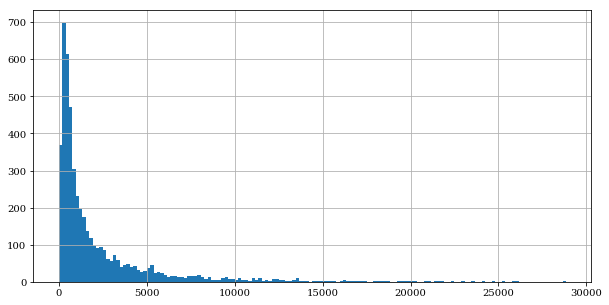

In [67]:
# View distribution of time_delta
time_delta = lewd_conduct_df.time_delta

time_delta.hist(bins=150, figsize=(10,5))

In [72]:
# Add bins for time_deltas

bins = [0, 300, 600, 1200, 2400, 4800, 9600, np.inf]
names = ['<5min', '5-10min', '10-20min', '20-40min', '40-80min', '80-160min', '160+min']

lewd_conduct_df['timedelta_ranges'] = pd.cut(lewd_conduct_df['time_delta'], bins, labels=names)

In [8]:
# Export csv of df for Tableau attempt.
lewd_conduct_df.to_csv('lewd_conduct_df.csv', index=True)

In [79]:
#The widget requires an edgelist with source, target and value columns
# dfm=pd.melt(df,id_vars=['DESTINATION','Region'], var_name='source', value_name='value')
# dfm.columns=['DESTINATION','target','source','value']
# dfm['target']=dfm['target']+'_'

# lewd_conduct_dfm = pd.melt(lewd_conduct_df, id_vars=['precinct'])

## pySankey Effort

In [80]:
# colorDict = {
#     'apple':'#f71b1b',
#     'blueberry':'#1b7ef7',
#     'banana':'#f3f71b',
#     'lime':'#12e23f',
#     'orange':'#f78c1b'
# }
# sankey(
#     df['true'], df['predicted'], aspect=20, colorDict=colorDict,
#     fontsize=12, figureName="fruit"
# )

In [81]:
# colorDict = {
#     'North': '#f71b1b',
#     'South': '#1b7ef7',
#     'East': '#f3f71b',
#     'West': '#12e23f',
#     'Southwest':'#f78c1b'
# }

# sankey.sankey(
#     lewd_conduct_df['precinct'], lewd_conduct_df['event_clearing'], aspect=20,
#     colorDict=colorDict, fontsize=12, figure_name='clearing'
# )

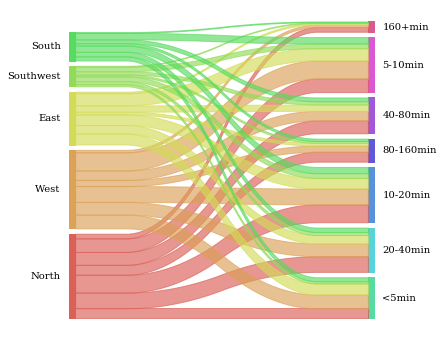

In [74]:
# Sankey showing event clearing by timedelta_range
sankey.sankey(
    left=lewd_conduct_df['precinct'], right=lewd_conduct_df['timedelta_ranges'],
    aspect=20, fontsize=10, figure_name='clearing'
)

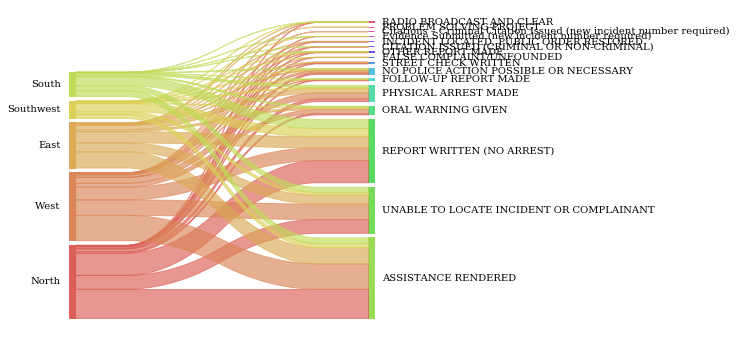

In [27]:
# Sankey showing event clearing by precinct
sankey.sankey(
    left=lewd_conduct_df['precinct'], right=lewd_conduct_df['event_clearing'],
    aspect=20, fontsize=10, figure_name='clearing'
)

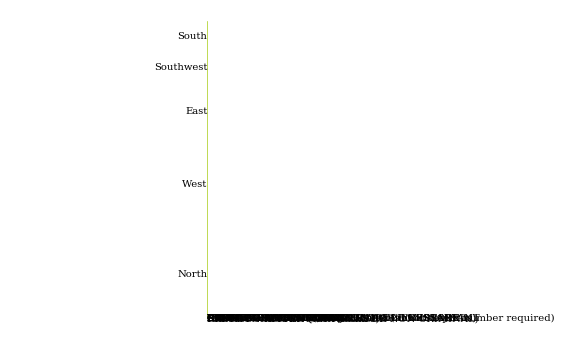

In [84]:

sankey.sankey(
    left=lewd_conduct_df['precinct'], right=lewd_conduct_df['event_clearing'], rightWeight=lewd_conduct_df['time_delta'],
    aspect=20, fontsize=10, figure_name='clearning'
)

## Sankey for all calls cleared UTL

In [77]:
# Create df containing only calls cleared unable to locate
lewd_utl_df = lewd_conduct_df[lewd_conduct_df.event_clearing == 'UNABLE TO LOCATE INCIDENT OR COMPLAINANT']

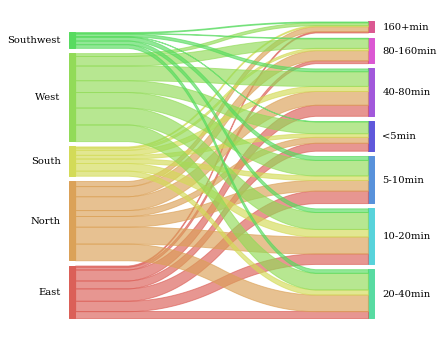

In [78]:
# Sankey showing event clearing by timedelta_range for calls cleared UTL
sankey.sankey(
    left=lewd_utl_df['precinct'], right=lewd_utl_df['timedelta_ranges'],
    aspect=20, fontsize=10, figure_name='clearing'
)